In [1]:
#	Use the location coordinates to find the distance for each trip. Create a new column – ‘distance’ and store its value there. Use the following formula:

import pandas as pd
import numpy as np

# Calculate the distance for each trip
data['distance'] = np.sqrt((data['dropoff_latitude'] - data['pickup_latitude'])**2 + 
                           (data['dropoff_longitude'] - data['pickup_longitude'])**2)

# Display the first few rows to verify the new column
print(data.head())


NameError: name 'data' is not defined

In [24]:
#2.	Find all the ‘key’ values for which the attributes: fare_amount & passenger_count & distance are outliers. Remove all rows with outliers.

# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in the specified columns
outliers_fare = detect_outliers(data, 'fare_amount')
outliers_passenger = detect_outliers(data, 'passenger_count')
outliers_distance = detect_outliers(data, 'distance')

# Combine all outliers into a single DataFrame
all_outliers = pd.concat([outliers_fare, outliers_passenger, outliers_distance]).drop_duplicates()

# Find the 'key' values of the outliers
outlier_keys = all_outliers['key'].unique()

# Remove rows with outliers
cleaned_data = data[~data['key'].isin(outlier_keys)]


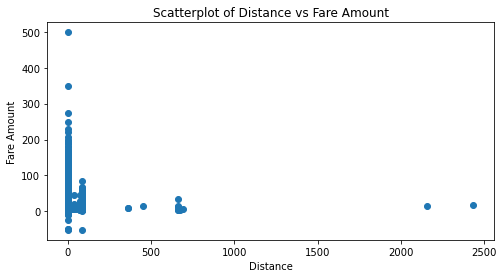

In [23]:
#3.	Show the scatterplot between distance & fare_amount. Is there any relationship that you can identify?

import matplotlib.pyplot as plt

# Create a scatterplot of distance vs fare amount
plt.figure(figsize=(8,4))
plt.scatter(data['distance'], data['fare_amount'])
plt.title('Scatterplot of Distance vs Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()